In [1]:
%pylab --no-import-all notebook
from math import sqrt, factorial, isnan
import warnings
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import itertools as it
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"

Populating the interactive namespace from numpy and matplotlib


# Načtení a skutečný náhled jak má vypadat výsledek

In [489]:
X = np.load(way1 + "No106.npy")
np.load(way1 + "No106_info.npy")

array(['Record number: ', '15312'],
      dtype='<U15')

<IPython.core.display.Javascript object>


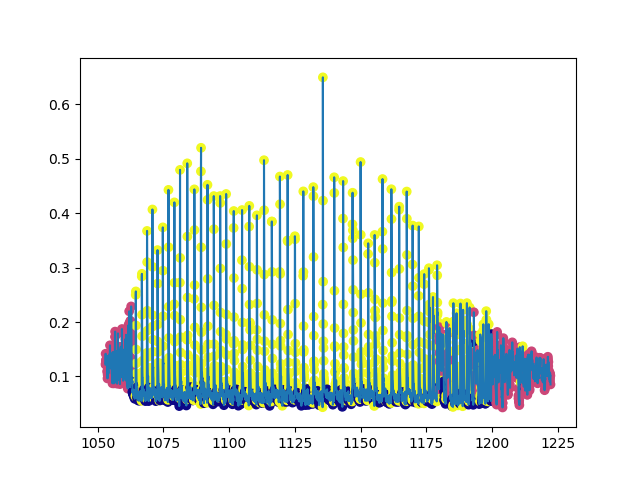

In [490]:
plt.figure("Data s labely podle databáze")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = X[2] , cmap = plt.cm.plasma)
plt.show()

In [4]:
XF = CL.Set_Features(X[1], šum = False, velikost_sumu = 1/40, delka_okna = 8, prvni_derivace = False,
               druha_derivace = False, suma_zleva = True, aritmeticky_prumer = True,
               rozptyl = True, vypis_nastacene_vlastnosti = False)[0]

## Standartní unsupervised HMM

In [6]:
G_HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")

In [7]:
warnings.filterwarnings('ignore')
G_HMM.fit(XF)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [8]:
states = G_HMM.predict(XF)
states

array([2, 2, 2, ..., 2, 2, 2])

<IPython.core.display.Javascript object>


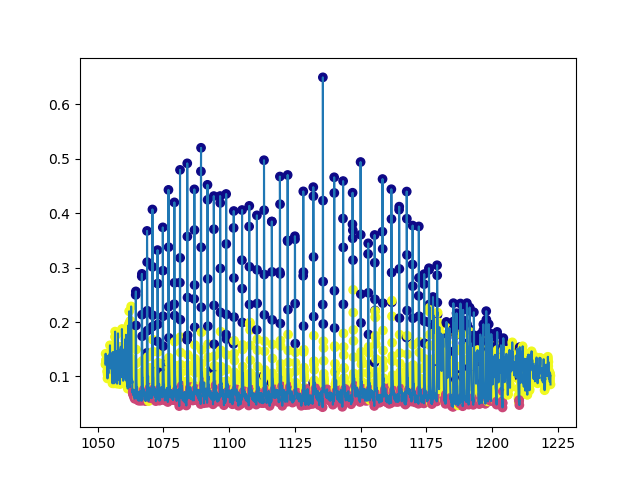

In [9]:
plt.figure("standartní predikce")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = states , cmap = plt.cm.plasma)
plt.show()

In [10]:
G_HMM.means_

array([[  2.61123899e-01,   1.05342741e-01,   1.29855235e-01,
          1.24371667e-02],
       [  6.29409545e-02,   4.59024136e-02,   6.48612772e-02,
          3.43601533e-05],
       [  1.12184356e-01,   9.46027679e-02,   1.35835344e-01,
          2.76151897e-03]])

In [11]:
G_HMM.covars_

array([[[  1.11787142e-02,   1.49865083e-03,   1.39821792e-03,
           6.88258371e-04],
        [  1.49865083e-03,   1.41425836e-03,   1.67949493e-03,
           3.61506085e-04],
        [  1.39821792e-03,   1.67949493e-03,   2.01647901e-03,
           4.09799317e-04],
        [  6.88258371e-04,   3.61506085e-04,   4.09799317e-04,
           1.34590504e-04]],

       [[  5.10112728e-05,   2.37984084e-05,   3.04034963e-05,
           5.50928872e-06],
        [  2.37984084e-05,   2.26103923e-05,   3.09365598e-05,
           5.55928976e-06],
        [  3.04034963e-05,   3.09365598e-05,   4.38070947e-05,
           5.61118648e-06],
        [  5.50928872e-06,   5.55928976e-06,   5.61118648e-06,
           5.48425767e-06]],

       [[  1.00373304e-03,   5.28407552e-04,   6.21927319e-04,
           5.26815637e-05],
        [  5.28407552e-04,   7.58574792e-04,   1.08923231e-03,
           1.23965649e-04],
        [  6.21927319e-04,   1.08923231e-03,   1.62387216e-03,
           1.80399207e-

# Pokusy s startprobability

In [334]:
F = CL.Set_Features(X[1], šum = False, velikost_sumu = 1/40, delka_okna = 8, prvni_derivace = False,
               druha_derivace = False, suma_zleva = True, aritmeticky_prumer = True,
               rozptyl = True, vypis_nastacene_vlastnosti = False)[0]

In [335]:
HMM = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi",init_params = 's')

In [336]:
warnings.filterwarnings('ignore')
HMM.fit(F)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='s', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [337]:
HMM.transmat_

array([[  9.53903071e-01,   9.60090694e-15,   4.60969289e-02],
       [  2.30291254e-01,   7.69708746e-01,   2.29387280e-30],
       [  2.46895409e-10,   3.28977081e-02,   9.67102292e-01]])

In [338]:
states1 = HMM.predict(F)
states1

array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


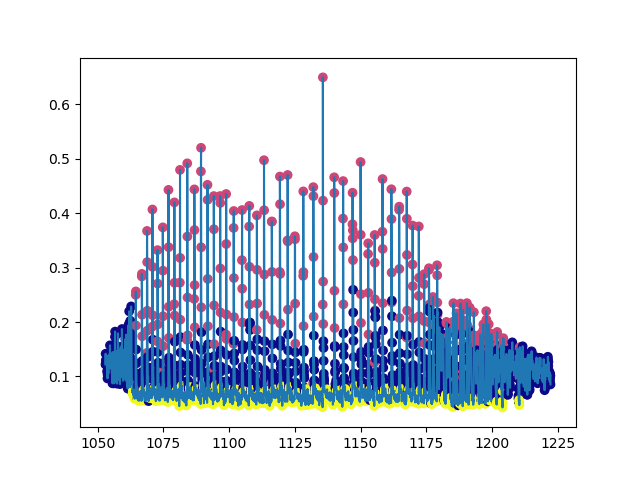

In [339]:
plt.figure("startprob predikce")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = states1 , cmap = plt.cm.plasma)
plt.show()

In [340]:
HMM.transmat_

array([[  9.53903071e-01,   9.60090694e-15,   4.60969289e-02],
       [  2.30291254e-01,   7.69708746e-01,   2.29387280e-30],
       [  2.46895409e-10,   3.28977081e-02,   9.67102292e-01]])

In [341]:
tm = copy(HMM.transmat_[0,1])
HMM.transmat_[0,1] = 0
HMM.transmat_[0,2] = HMM.transmat_[0,2] + tm 

In [342]:
HMM.transmat_

array([[  9.53903071e-01,   0.00000000e+00,   4.60969289e-02],
       [  2.30291254e-01,   7.69708746e-01,   2.29387280e-30],
       [  2.46895409e-10,   3.28977081e-02,   9.67102292e-01]])

In [343]:
t1 = copy(HMM.transmat_[1,0])
HMM.transmat_[1,0] = 0
HMM.transmat_[1,2] = HMM.transmat_[1,2] + t1 

In [344]:
HMM.transmat_

array([[  9.53903071e-01,   0.00000000e+00,   4.60969289e-02],
       [  0.00000000e+00,   7.69708746e-01,   2.30291254e-01],
       [  2.46895409e-10,   3.28977081e-02,   9.67102292e-01]])

In [345]:
HMM.transmat_[1,:]

array([ 0.        ,  0.76970875,  0.23029125])

In [346]:
states2 = HMM.predict(F)
states2

array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


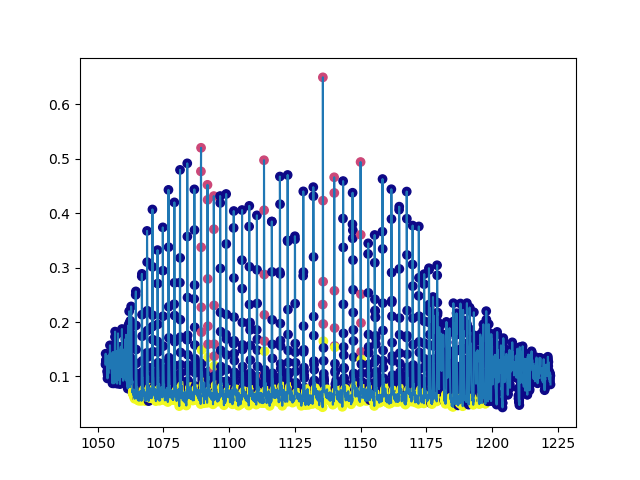

In [347]:
plt.figure("úprava T predikce")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = states2 , cmap = plt.cm.plasma)
plt.show()

test vlivu vynulování pravděpodobnosti přechodu z Elmu do L-módu skončil katastrofou

# testy s středními hodnotami

In [28]:
HMM_m = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")

In [29]:
XF = CL.Set_Features(X[1], šum = False, velikost_sumu = 1/40, delka_okna = 8, prvni_derivace = False,
               druha_derivace = False, suma_zleva = True, aritmeticky_prumer = True,
               rozptyl = True, vypis_nastacene_vlastnosti = False)[0]

In [30]:
HMM_m.fit(XF)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [31]:
HMM_m.predict(XF)

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
#plt.figure("predikce")
#plt.plot(X[0], X[1])
#plt.scatter(X[0],X[1], c = HMM_m.predict(XF) , cmap = plt.cm.plasma)
#plt.show()

In [33]:
HMM_m.means_

array([[  1.12189473e-01,   9.46069963e-02,   1.35840384e-01,
          2.76229790e-03],
       [  6.29410936e-02,   4.59027829e-02,   6.48618832e-02,
          3.43658598e-05],
       [  2.61142178e-01,   1.05332331e-01,   1.29840284e-01,
          1.24360390e-02]])

In [54]:
pr = HMM_m.predict(XF)
x0 = []
for x in range(len(XF[:,0])):
    if pr[x] == 0:
        x0.append(XF[:,0][x])

In [62]:
np.mean(x0)

0.11144818237681432

In [63]:
pr = HMM_m.predict(XF)
x0 = []
for x in range(len(XF[:,1])):
    if pr[x] == 0:
        x0.append(XF[:,1][x])

In [64]:
np.mean(x0)

0.094081961999688921

In [65]:
pr = HMM_m.predict(XF)
x0 = []
for x in range(len(XF[:,2])):
    if pr[x] == 0:
        x0.append(XF[:,2][x])

In [66]:
np.mean(x0)

0.13518612181988157

In [67]:
pr = HMM_m.predict(XF)
x0 = []
for x in range(len(XF[:,0])):
    if pr[x] == 1:
        x0.append(XF[:,0][x])

In [68]:
np.mean(x0)

0.062922907122173174

## výpočet středních hodnot a jenjich nastavení jako vstupního parametru

In [309]:
means = np.zeros((3,4))

In [310]:
means

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [311]:
st = X[2]
st0=0
st1=0
st2=0
for s in range(len(st)):
    if st[s]==0:
        means[0,0] = means[0,0]+XF[:,0][s]
        means[0,1] = means[0,1]+XF[:,1][s]
        means[0,2] = means[0,2]+XF[:,2][s]
        means[0,3] = means[0,3]+XF[:,3][s]
        st0 +=1
    if st[s]==1:
        means[1,0] = means[1,0]+XF[:,0][s]
        means[1,1] = means[1,1]+XF[:,1][s]
        means[1,2] = means[1,2]+XF[:,2][s]
        means[1,3] = means[1,3]+XF[:,3][s]
        st1 +=1
    if st[s]==2:
        means[2,0] = means[2,0]+XF[:,0][s]
        means[2,1] = means[2,1]+XF[:,1][s]
        means[2,2] = means[2,2]+XF[:,2][s]
        means[2,3] = means[2,3]+XF[:,3][s]
        st2 +=1

In [312]:
means[0] = means[0]/st0
means[1] = means[1]/st1
means[2] = means[2]/st2

In [313]:
means

array([[  6.30898292e-02,   4.60135197e-02,   6.50258282e-02,
          5.74071704e-05],
       [  1.18087401e-01,   8.42576136e-02,   1.18027721e-01,
          3.89443726e-04],
       [  1.25775858e-01,   8.82705776e-02,   1.23563991e-01,
          5.40679619e-03]])

In [400]:
Hm = GaussianHMM(3,covariance_type = "diag", algorithm = "viterbi", init_params='tc', 
                 params = 'mtc')


In [401]:
Hm.means_ = means
Hm.startprob_ = np.array([0,1,0])

In [402]:
Hm.means_

array([[  6.30898292e-02,   4.60135197e-02,   6.50258282e-02,
          5.74071704e-05],
       [  1.18087401e-01,   8.42576136e-02,   1.18027721e-01,
          3.89443726e-04],
       [  1.25775858e-01,   8.82705776e-02,   1.23563991e-01,
          5.40679619e-03]])

In [407]:
Hm.fit(XF)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='tc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='mtc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [408]:
Hm.means_

array([[  6.28502286e-02,   4.57942561e-02,   6.47193400e-02,
          3.79077391e-05],
       [  1.11007614e-01,   8.26675294e-02,   1.17277206e-01,
          8.19754746e-04],
       [  2.06447118e-01,   1.33390234e-01,   1.82232288e-01,
          1.37546337e-02]])

In [319]:
stavy_0 = Hm.predict(XF)

<IPython.core.display.Javascript object>


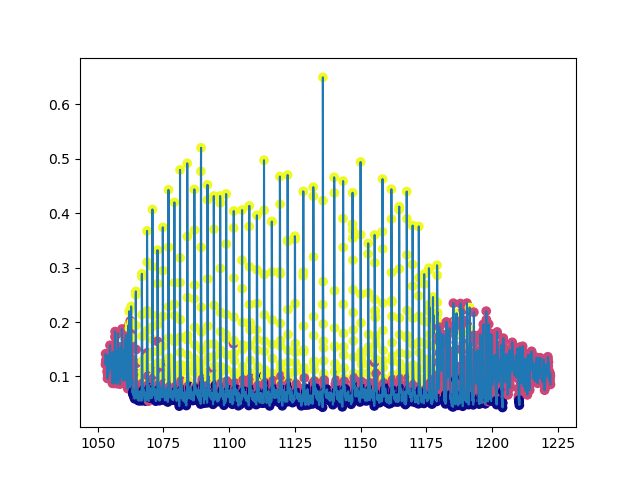

In [320]:
plt.figure("predikce")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = stavy_0 , cmap = plt.cm.plasma)
plt.show()

In [222]:
Hm.transmat_

array([[  9.66667599e-01,   1.13117871e-60,   3.33324014e-02],
       [  3.82033318e-06,   4.44970918e-75,   9.99996180e-01],
       [  5.92636749e-02,   2.38469751e-46,   9.40736325e-01]])

In [321]:
tm = copy(Hm.transmat_[1,2])
Hm.transmat_[1,2] = 0
Hm.transmat_[1,1] = Hm.transmat_[1,1] + tm 
Hm.transmat_

array([[  9.67203727e-01,   1.15815031e-02,   2.12147699e-02],
       [  5.35934789e-02,   9.46406521e-01,   0.00000000e+00],
       [  2.91498919e-35,   1.11599253e-01,   8.88400747e-01]])

In [322]:
stavy_1 = Hm.predict(XF)
stavy_1

array([1, 1, 1, ..., 1, 1, 1])

<IPython.core.display.Javascript object>


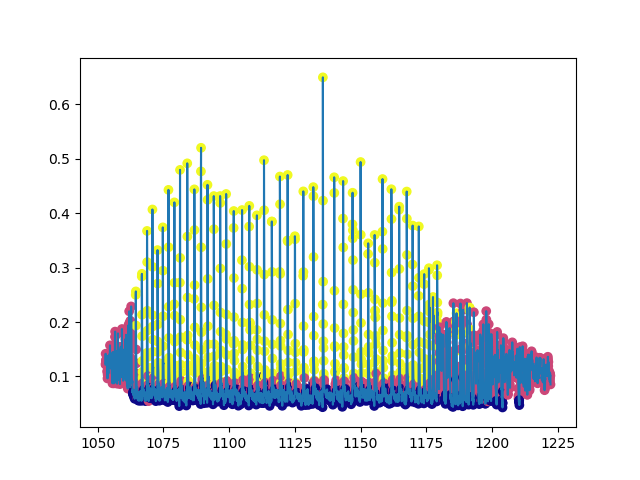

In [323]:
plt.figure("predikce 2")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = stavy_1 , cmap = plt.cm.plasma)
plt.show()

## rozdíl mezi stavy_0 a stavy_1

In [324]:
np.allclose(stavy_0,stavy_1)

False

In [325]:
sum(stavy_0!=stavy_1)

20

In [326]:
sum(stavy_0!=stavy_1)/len(XF[:,0])

0.0059049306170652497

po vynulování pravděpodobnosti přechodu z L-módu do Elmu se predikce změnila o 20 bodů tj.0.6%

### Po přidání středních hodnot rysů při inicializaci se (prozatím) ustálilo číslování stavů a model se oproti "standartní" unsupervised predikci výrazně zlepšíl

# Testy s kovarianční maticí

In [393]:
variance = np.zeros((3,4,4))
variance

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [483]:
meanss = np.zeros((3,4))
meanss

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [376]:
Lmod = {0:[],  1:[] , 2:[] , 3:[]}
Lmod

{0: [], 1: [], 2: [], 3: []}

In [377]:
Hmod = {0:[],  1:[] , 2:[] , 3:[]}
Hmod

{0: [], 1: [], 2: [], 3: []}

In [378]:
Elm = {0:[],  1:[] , 2:[] , 3:[]}
Elm

{0: [], 1: [], 2: [], 3: []}

In [379]:
st = X[2]
for s in range(len(st)):
    if st[s]==0:
        Hmod[0].append(XF[:,0][s])
        Hmod[1].append(XF[:,1][s])
        Hmod[2].append(XF[:,2][s])
        Hmod[3].append(XF[:,3][s])
    if st[s]==1:
        Lmod[0].append(XF[:,0][s])
        Lmod[1].append(XF[:,1][s])
        Lmod[2].append(XF[:,2][s])
        Lmod[3].append(XF[:,3][s])
    if st[s]==2:
        Elm[0].append(XF[:,0][s])
        Elm[1].append(XF[:,1][s])
        Elm[2].append(XF[:,2][s])
        Elm[3].append(XF[:,3][s])
        

In [484]:
meanss[0,0] = np.mean(Hmod[0])
meanss[0,1] = np.mean(Hmod[1])
meanss[0,2] = np.mean(Hmod[2])
meanss[0,3] = np.mean(Hmod[3])
meanss[1,0] = np.mean(Lmod[0])
meanss[1,1] = np.mean(Lmod[1])
meanss[1,2] = np.mean(Lmod[2])
meanss[1,3] = np.mean(Lmod[3])
meanss[2,0] = np.mean(Elm[0])
meanss[2,1] = np.mean(Elm[1])
meanss[2,2] = np.mean(Elm[2])
meanss[2,3] = np.mean(Elm[3])

In [394]:
variance[0,0,0] = np.var(Hmod[0])
variance[0,1,1] = np.var(Hmod[1])
variance[0,2,2] = np.var(Hmod[2])
variance[0,3,3] = np.var(Hmod[3])
variance[1,0,0] = np.var(Lmod[0])
variance[1,1,1] = np.var(Lmod[1])
variance[1,2,2] = np.var(Lmod[2])
variance[1,3,3] = np.var(Lmod[3])
variance[2,0,0] = np.var(Elm[0])
variance[2,1,1] = np.var(Elm[1])
variance[2,2,2] = np.var(Elm[2])
variance[2,3,3] = np.var(Elm[3])


In [456]:
variance

array([[[  8.03637813e-05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   3.93679683e-05,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   9.24293128e-05,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           4.74739323e-08]],

       [[  7.11319323e-04,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   1.69481016e-04,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   3.08871044e-04,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           3.27977532e-07]],

       [[  8.34562717e-03,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   1.63121028e-03,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   3.14332278e-03,
           0.00000000e+

## Testování modelu s inicializovanýma rozptylama

In [461]:
Hmm = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

In [462]:
Hmm.means_ = meanss
Hmm.covars_ = variance
Hmm.startprob_ = np.array([0,1,0])

In [463]:
Hmm.fit(XF)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='t', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='mtc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [464]:
#stavy_3 = Hmm.predict(XF)

In [465]:
Hmm.means_

array([[  6.27462864e-02,   4.54204432e-02,   6.40708005e-02,
          2.83098686e-05],
       [  1.03873383e-01,   8.07589892e-02,   1.15287231e-01,
          5.72460780e-04],
       [  1.94550931e-01,   1.22151301e-01,   1.66492565e-01,
          1.16340843e-02]])

In [466]:
Hmm.covars_

array([[[  5.00898970e-05,   2.16838672e-05,   2.68988628e-05,
           5.78500033e-06],
        [  2.16838672e-05,   1.82895312e-05,   2.37880060e-05,
           5.79632540e-06],
        [  2.68988628e-05,   2.37880060e-05,   3.20642664e-05,
           5.81304209e-06],
        [  5.78500033e-06,   5.79632540e-06,   5.81304209e-06,
           5.77212157e-06]],

       [[  8.51660551e-04,   3.36663526e-04,   3.87179935e-04,
           7.85793092e-06],
        [  3.36663526e-04,   2.41065801e-04,   3.20683709e-04,
           1.23376027e-05],
        [  3.87179935e-04,   3.20683709e-04,   4.45529981e-04,
           1.46524050e-05],
        [  7.85793092e-06,   1.23376027e-05,   1.46524050e-05,
           9.52080156e-06]],

       [[  1.03810587e-02,  -1.02813256e-04,  -1.48875577e-03,
           4.02784530e-04],
        [ -1.02813256e-04,   1.20067018e-03,   1.71370123e-03,
           2.13420042e-04],
        [ -1.48875577e-03,   1.71370123e-03,   2.74343425e-03,
           2.39826218e-

In [467]:
tm = copy(Hmm.transmat_[1,2])
Hmm.transmat_[1,2] = 0
Hmm.transmat_[1,1] = Hmm.transmat_[1,1] + tm 
Hmm.transmat_

array([[  9.65893244e-01,   9.16856950e-20,   3.41067560e-02],
       [  5.27792451e-02,   9.47220755e-01,   0.00000000e+00],
       [  2.12975351e-42,   1.21229689e-01,   8.78770311e-01]])

In [468]:
stavy_3 = Hmm.predict(XF)
stavy_3

array([1, 1, 1, ..., 1, 1, 1])

<IPython.core.display.Javascript object>


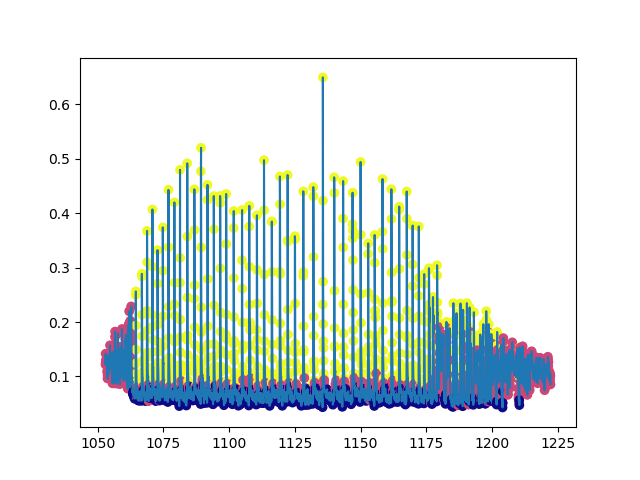

In [469]:
plt.figure("predikce 3")
plt.plot(X[0], X[1])
plt.scatter(X[0],X[1], c = stavy_3 , cmap = plt.cm.plasma)
plt.show()

In [455]:
sum(stavy_1!= stavy_3)

187

In [488]:
help(CL.Accuracy)

Help on function Accuracy in module Classification:

Accuracy(výsledek, stavy, pocet_stavu, srovnat=True)



In [473]:
CL.Accuracy(X[2], stavy_3, 3, False)

[0.76232654266312372, 805]

In [474]:
CL.Accuracy(X[2], stavy_1, 3, False)

[0.75228816061411274, 839]

In [475]:
CL.Accuracy(X[2], stavy_0, 3, False)

[0.74638322999704754, 859]

In [482]:
CL.Accuracy(X[2], states1, 3, True)

[0.68999114260407435, 1050]

# Pokus

In [513]:
Y = np.load(way1 + "No108.npy")
np.load(way1 + "No108_info.npy")

array(['Record number: ', '15318'],
      dtype='<U15')

In [514]:
XFF = CL.Set_Features(Y[1], False, 1/40, 8, False, False, True, True, True, False)[0]


In [520]:
XX = np.vstack((XF,XFF))
np.shape(XX)

(6706, 4)

In [515]:
print(len(XF),len(XFF))

3387 3319


In [522]:
leny = np.array([len(XF),len(XFF)])

In [518]:
XXX = GaussianHMM(3,covariance_type = "full", algorithm = "viterbi")

In [523]:
XXX.fit(XX, leny)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [525]:
XXX.means_

array([[  6.19422063e-02,   4.47530891e-02,   6.30917202e-02,
          2.33928536e-05],
       [  1.05725202e-01,   8.56588624e-02,   1.23526924e-01,
          1.03402035e-03],
       [  2.17640720e-01,   1.19362191e-01,   1.55915514e-01,
          1.11678616e-02]])

In [526]:
XXX.covars_

array([[[  4.11350138e-05,   1.74591943e-05,   2.23751932e-05,
           2.79932689e-06],
        [  1.74591943e-05,   1.45857012e-05,   1.97878481e-05,
           2.81013043e-06],
        [  2.23751932e-05,   1.97878481e-05,   2.76094908e-05,
           2.82452696e-06],
        [  2.79932689e-06,   2.81013043e-06,   2.82452696e-06,
           2.78860034e-06]],

       [[  7.89752974e-04,   3.87965198e-04,   4.88132296e-04,
           1.89382474e-06],
        [  3.87965198e-04,   4.73026032e-04,   7.15268683e-04,
           3.29790698e-05],
        [  4.88132296e-04,   7.15268683e-04,   1.10816378e-03,
           5.48865316e-05],
        [  1.89382474e-06,   3.29790698e-05,   5.48865316e-05,
           9.22361658e-06]],

       [[  8.97499089e-03,   1.13944213e-04,  -6.66888118e-04,
           3.68174056e-04],
        [  1.13944213e-04,   1.42580856e-03,   1.99346653e-03,
           2.21245001e-04],
        [ -6.66888118e-04,   1.99346653e-03,   2.95271286e-03,
           2.67323784e-

In [535]:
XXX.predict(XX,leny)

array([2, 2, 2, ..., 1, 1, 1])

<IPython.core.display.Javascript object>


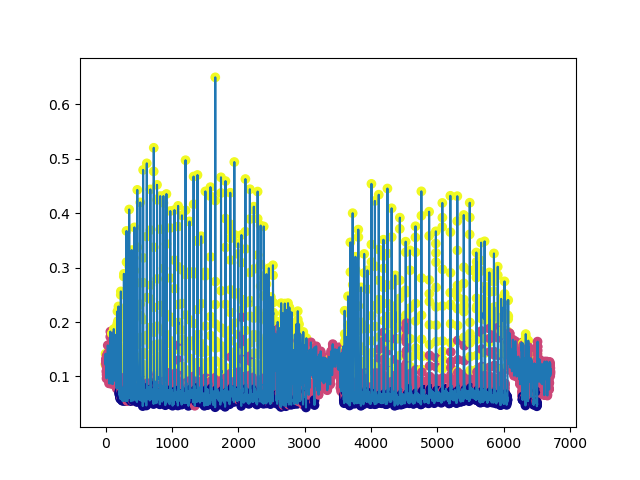

In [536]:
plt.figure("testttt")
plt.plot(np.arange(sum(leny)), XX[:,0])
plt.scatter(np.arange(sum(leny)), XX[:,0], c = XXX.predict(XX), cmap = plt.cm.plasma)
plt.show()

# Automatizace výpočtu mean a var 

In [576]:
pre = {}
prst = {}
pocet_stavu = 3
pocet_feature = 4
typy_stavu = ['H_mod', 'Lmod', 'Elm']

for s in range(pocet_stavu):
    pre[s] = {}
    for f in range(pocet_feature):
        pre[s][f] = []

for s in typy_stavu:
    prst[s] = {}
    for f in range(pocet_feature):
        prst[s][f] = []


In [577]:
pre

{0: {0: [], 1: [], 2: [], 3: []},
 1: {0: [], 1: [], 2: [], 3: []},
 2: {0: [], 1: [], 2: [], 3: []}}

In [578]:
prst

{'Elm': {0: [], 1: [], 2: [], 3: []},
 'H_mod': {0: [], 1: [], 2: [], 3: []},
 'Lmod': {0: [], 1: [], 2: [], 3: []}}

In [579]:
st = X[2]
for s in range(len(st)):
    for i in range(pocet_feature):
        pre[st[s]][i].append(XF[:,i][s])
  

In [586]:
stred = np.zeros((3,4))
for i in pre:
    for j in pre[i]:
        stred[i][j] = np.mean(pre[i][j])

In [588]:
np.allclose(stred,means)

True

In [602]:
def Preprocessing(data, pocet_stavu, pocet_rysu, labels):
    sorted_data_according_states = {}
    
    for state in range(pocet_stavu):
        sorted_data_according_states[state] = {}
        for feature in range(pocet_feature):
            sorted_data_according_states[state][feature] = []

    for label in range(len(labels)):
        for feature in range(pocet_feature):
            sorted_data_according_states[labels[label]][feature].append(data[:,feature][label])
    
    means = np.zeros((pocet_stavu, pocet_feature))
    for i in sorted_data_according_states:
        for j in sorted_data_according_states[i]:
            means[i, j] = np.mean(sorted_data_according_states[i][j])
            
    variance = np.zeros((pocet_stavu, pocet_feature, pocet_feature))
    for i in sorted_data_according_states:
        for j in sorted_data_according_states[i]:
            variance[i, j, j] = np.var(sorted_data_according_states[i][j])
            
    return [means, variance]
    

In [603]:
[m,v] = Preprocessing(XF, 3, 4, X[2])

In [604]:
np.allclose(m,means)

True

In [601]:
np.allclose(v,variance)

True

# Normování

In [624]:
Y = np.load(way1 + "No108.npy")
np.load(way1 + "No108_info.npy")

array(['Record number: ', '15318'],
      dtype='<U15')

In [625]:
Z = np.load(way1 + "No101.npy")
np.load(way1 + "No101_info.npy")

array(['Record number: ', '13484'],
      dtype='<U15')

<IPython.core.display.Javascript object>


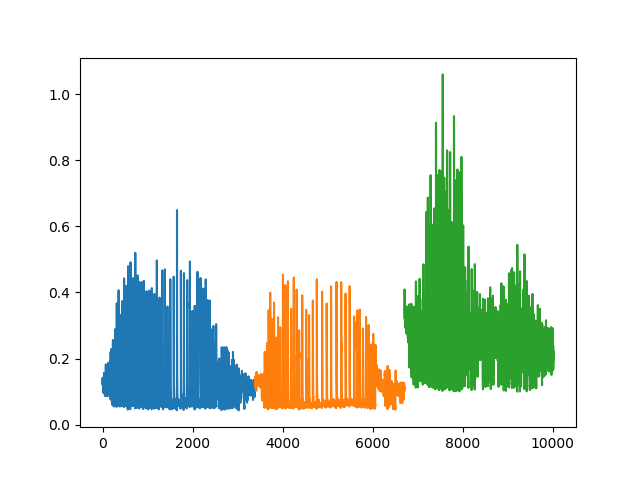

In [626]:
plt.figure("standart")
plt.plot(np.arange(len(nexttry)), X[1])
plt.plot(np.arange(len(Y[1]))+len(X[0]), Y[1])
plt.plot(np.arange(len(Z[1]))+len(X[0])+ len(Y[0]), Z[1])
plt.show()

<IPython.core.display.Javascript object>


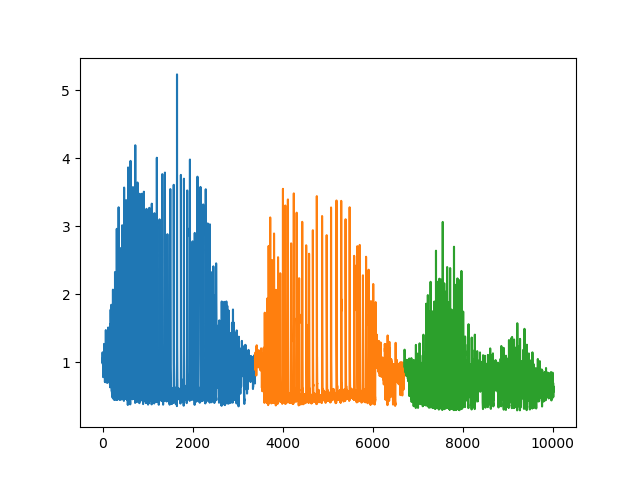

In [630]:
plt.figure("Normování podle úseku ( délka úseku je 20)")
plt.plot(np.arange(len(X[1])), X[1]/np.mean([X[1][:20]]))
plt.plot(np.arange(len(Y[1]))+len(X[0]), Y[1]/np.mean(Y[1][:20]))
plt.plot(np.arange(len(Z[1]))+len(X[0])+ len(Y[0]), Z[1]/np.mean(Z[1][:20]))
plt.show()

<IPython.core.display.Javascript object>


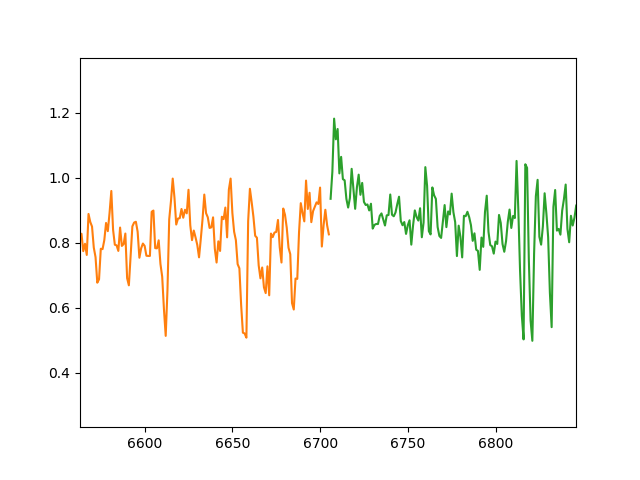

In [632]:
plt.figure("Normování podle úseku, přiblížený na přechod( délka úseku je 20)")
plt.plot(np.arange(len(X[1])), X[1]/np.mean([X[1][:20]]))
plt.plot(np.arange(len(Y[1]))+len(X[0]), Y[1]/np.mean(Y[1][:20]))
plt.plot(np.arange(len(Z[1]))+len(X[0])+ len(Y[0]), Z[1]/np.mean(Z[1][:20]))
plt.show()

<IPython.core.display.Javascript object>


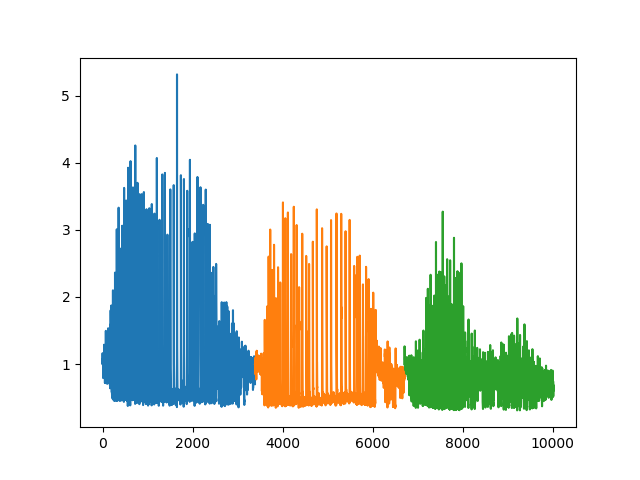

In [628]:
plt.figure("Normování podle prvního prvku")
plt.plot(np.arange(len(nexttry)), X[1]/X[1][0])
plt.plot(np.arange(len(Y[1]))+len(X[0]), Y[1]/Y[1][0])
plt.plot(np.arange(len(Z[1]))+len(X[0])+ len(Y[0]), Z[1]/Z[1][0])
plt.show()

<IPython.core.display.Javascript object>


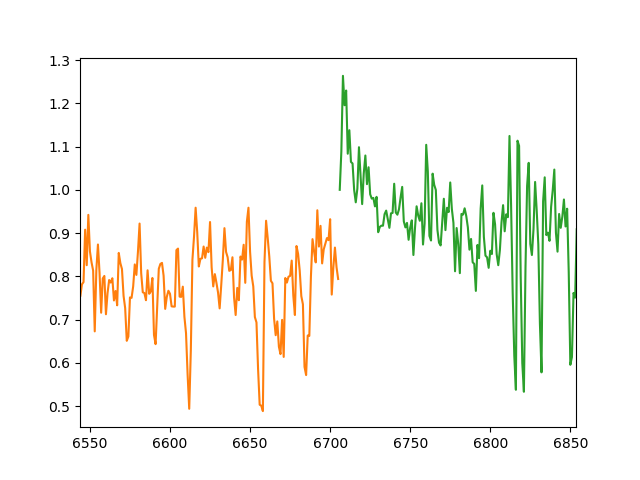

In [633]:
plt.figure("Normování podle prvního prvku, přiblížený na přechod")
plt.plot(np.arange(len(nexttry)), X[1]/X[1][0])
plt.plot(np.arange(len(Y[1]))+len(X[0]), Y[1]/Y[1][0])
plt.plot(np.arange(len(Z[1]))+len(X[0])+ len(Y[0]), Z[1]/Z[1][0])
plt.show()

<IPython.core.display.Javascript object>


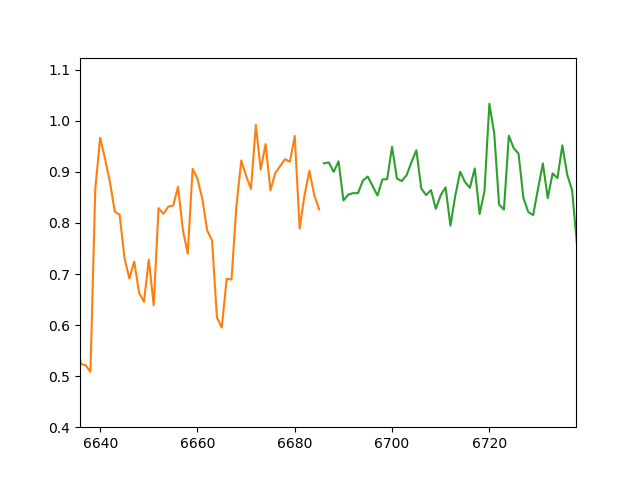

In [635]:
plt.figure("Normování podle úseku, odebraný počátek datasetu")
plt.plot(np.arange(len(nexttry)), X[1]/X[1][0])
plt.plot(np.arange(len(Y[1])-20)+len(X[0]), Y[1][20:]/np.mean(Y[1][:20]))
plt.plot(np.arange(len(Z[1])-20)+len(X[0])+ len(Y[0])-20, Z[1][20:]/np.mean(Z[1][:20]))
plt.show()

In [640]:
tr = [X,Y]

In [644]:
len(tr[1][1])

3319

In [652]:
range(2,18)

range(2, 18)

In [653]:
len(range(2,18))

16